In [19]:
# importing the necessary packages
#sources 
#http://www.numpy.org/
#https://pandas.pydata.org/
#https://stackoverflow.com/
#http://scikit-learn.org/stable/


import os, json, glob
import os.path as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import json_lines
from pandas.tools.plotting import autocorrelation_plot
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf
import math

In [38]:
frames_left = pd.read_json('Left/El_left_2.jsonl', lines=True)
frames_right = pd.read_json('Right/El_right_2.jsonl', lines=True)

In [39]:
print(len(frames_left))
print(len(frames_right))

189
143


In [40]:
print(frames_left.head())

                                              people  version
0  [{'hand_right_keypoints_2d': [0, 0, 0, 0, 0, 0...      1.2
1  [{'hand_right_keypoints_2d': [599.366, 649.895...      1.2
2  [{'hand_right_keypoints_2d': [594.453, 619.497...      1.2
3  [{'hand_right_keypoints_2d': [688.564, 561.693...      1.2
4  [{'hand_right_keypoints_2d': [786.655, 584.468...      1.2


In [41]:
kp1 = frames_left.iloc[:,0]
print((kp1[0][0]['hand_left_keypoints_2d']))

[904.231, 131.825, 0.248115, 917.045, 149.623, 0.245389, 937.69, 170.98, 0.188223, 962.607, 173.116, 0.221081, 988.235, 182.371, 0.0730159, 956.912, 133.249, 0.0947314, 993.219, 133.961, 0.057949299999999995, 1002.47, 138.233, 0.0198014, 995.354, 173.828, 0.014762099999999998, 962.607, 126.842, 0.0380833, 986.1, 135.385, 0.0258199, 995.354, 163.861, 0.0162016, 981.116, 180.235, 0.0184863, 959.047, 128.978, 0.038077799999999995, 986.812, 133.961, 0.0215893, 968.302, 163.861, 0.019814099999999998, 978.981, 180.947, 0.0196893, 960.471, 127.554, 0.0326793, 993.931, 132.537, 0.023686199999999998, 995.354, 138.233, 0.0219396, 961.895, 162.437, 0.0142692]


In [42]:
kp2 = frames_right.iloc[:,0]
print((kp2[0][0]['hand_right_keypoints_2d']))

[507.285, 655.633, 0.739333, 493.412, 637.906, 0.8401879999999999, 472.602, 622.491, 0.809407, 454.104, 614.784, 0.785774, 445.626, 605.535, 0.826276, 447.938, 638.677, 0.622872, 440.23, 627.115, 0.401252, 435.606, 614.013, 0.563449, 433.294, 605.535, 0.753687, 448.709, 644.842, 0.629273, 435.606, 636.364, 0.450988, 435.606, 622.491, 0.8835259999999999, 434.065, 607.847, 0.6624559999999999, 451.021, 657.174, 0.760324, 434.835, 643.301, 0.727799, 434.835, 630.198, 0.844942, 438.689, 622.491, 0.583504, 452.562, 665.652, 0.9153629999999999, 444.855, 654.091, 0.812396, 439.46, 641.76, 0.923319, 440.23, 630.198, 0.744037]


In [43]:
rms = []
names = []

In [44]:
x_points_left = []
y_points_left = []
c_points_left = []
x_points_right = []
y_points_right = []
c_points_right = []
for i in range(len(kp1)):
    res1 = kp1[i]
    if len(res1) == 0:
        res1 = [0]*63
    else:
        res1 = kp1[i][0]['hand_left_keypoints_2d']
    x_l = x_points_left.append([res1[k] for k in range(0,63,3)])
    y_l = y_points_left.append([res1[k] for k in range(1,63,3)])
    c_l = c_points_left.append([res1[k] for k in range(2,63,3)])

for i in range(len(kp2)):
    res2 = kp2[i]
    if len(res2) == 0:
        res2 = [0]*63
    else:
        res2 = kp2[i][0]['hand_right_keypoints_2d']
    x_r = x_points_right.append([res2[k] for k in range(0,63,3)])
    y_r = y_points_right.append([res2[k] for k in range(1,63,3)])
    c_r = c_points_right.append([res2[k] for k in range(2,63,3)])


In [45]:
x_points_right = x_points_right[:120]
y_points_right = y_points_right[:120]
c_points_right = c_points_right[:120]
x_points_left = x_points_left[:120]
y_points_left = y_points_left[:120]
c_points_left = c_points_left[:120]


In [46]:
fore_right_x = np.asarray([x[8] for x in x_points_right])
fore_right_y = np.asarray([y[8] for y in y_points_right])
fore_right_c = np.asarray([c[8] for c in c_points_right])
print(fore_right_x)

[433.294 435.301 435.287 435.284 434.361 431.132 428.849 429.204 436.558
 439.352 439.614 439.572 436.435 433.408 431.907 434.308 440.465 439.594
 439.98  439.596 437.579 432.88  433.149 443.369 443.808 444.544 442.908
 436.761 433.654 435.781 447.35  448.037 448.312 444.507 435.523 429.432
 428.703 433.053 449.605 449.65  449.561 443.515 432.581 427.439 428.209
 438.271 449.727 449.738 449.558 443.348 439.827 440.47  447.503 450.801
 450.811 450.683 445.044 443.266 443.259 446.273 454.487 452.959 452.927
 447.314 444.11  443.301 444.9   453.877 453.113 452.098 451.1   444.136
 440.972 441.034 443.466 451.3   451.528 451.502 446.481 441.569 439.362
 442.35  448.267 451.496 451.438 443.536 438.608 437.759 438.6   439.274
 443.177 444.602 444.779 444.795 445.772 448.217 449.759 449.213 449.508
 445.747 444.193 446.54  452.698 453.591 453.569 451.997 447.573 446.792
 448.121 453.695 454.404 455.992 456.573 449.473 447.945 447.866 448.439
 456.582 458.234 457.426]


In [47]:
thumb_right_x = np.asarray([x[4] for x in x_points_right])
thumb_right_y = np.asarray([y[4] for y in y_points_right])
thumb_right_c = np.asarray([c[4] for c in c_points_right])
print(thumb_right_x)
print(np.argwhere(thumb_right_x == 823.791))

[445.626 439.992 439.98  439.977 445.391 446.105 449.339 447.596 441.322
 440.971 442.013 445.169 448.428 449.398 449.405 449.309 444.441 442.776
 444.658 445.175 449.364 451.727 451.762 446.447 446.894 447.606 452.141
 452.957 453.556 452.748 451.198 451.915 451.429 453.811 456.563 459.044
 457.392 455.827 451.164 452.752 451.905 455.21  458.5   458.623 458.616
 456.068 452.846 453.637 454.236 458.273 457.852 456.926 453.772 454.718
 454.729 455.419 457.77  458.488 458.489 456.765 456.891 456.966 457.736
 461.882 462.725 462.722 462.702 457.883 457.091 456.941 458.4   463.367
 463.409 465.074 460.296 453.721 454.71  455.479 460.902 463.361 463.4
 461.722 456.28  455.502 458.648 462.627 464.251 464.202 465.846 463.312
 459.395 453.588 456.944 456.148 457.848 457.877 459.49  458.825 460.562
 464.557 465.355 463.782 459.803 459.077 459.055 460.617 463.82  464.587
 463.791 458.396 458.322 459.126 462.888 466.052 466.103 468.65  466.87
 459.826 459.04  459.036]
[]


In [48]:
fore_left_x = np.asarray([x[8] for x in x_points_left])
fore_left_y = np.asarray([y[8] for y in y_points_left])
fore_left_c = np.asarray([c[8] for c in c_points_left])
print(fore_left_x)
print(np.argwhere(fore_left_x == 157.314))

[995.354 811.153 703.245 510.285   0.    402.197   0.    385.868 384.099
 386.652 397.507 410.618 409.33  410.762 406.873 394.172 389.548   0.
   0.      0.    415.214 414.646 404.389 398.937 401.242 405.821 415.793
 416.984 414.659 410.182 398.918 394.889 396.388 397.449 404.841 413.216
 413.02  413.124 406.23    0.      0.    405.602   0.    422.161 419.601
 407.836 396.148 397.522   0.    421.106   0.    413.053   0.    395.603
 396.187 402.512 410.792 408.304 402.185 391.316 388.948 391.346 406.232
 412.18  412.216 408.326   0.      0.    392.423 397.158   0.      0.
 404.692   0.      0.      0.      0.      0.    404.457 404.623 399.965
 389.802 386.348 391.809   0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.    407.948 404.276 392.886 387.639 386.887
 395.685 409.054 409.511   0.    408.444   0.      0.      0.      0.
 402.261 404.121   0.    407.363 404.728   0.    403.128 404.327 406.365
 406.447 407.546 408.498]
[]


In [31]:
thumb_left_x = np.asarray([x[4] for x in x_points_left])
thumb_left_y = np.asarray([y[4] for y in y_points_left])
thumb_left_c = np.asarray([c[4] for c in c_points_left])
print(np.argwhere(thumb_left_x == 291.887))

[]


In [32]:
print(thumb_left_x)

[292.493 292.326 291.891 291.44  290.995 291.035 291.138   0.      0.
   0.      0.      0.      0.    289.04  287.336 289.534   0.      0.
 289.132 290.096 290.606 290.079 289.975 289.979   0.    291.771 292.293
 293.1   294.15  294.459 294.245 294.235 292.993 291.965   0.    290.424
   0.      0.    287.009 286.8   286.129 286.953 286.841 286.86  286.147
   0.    285.94  284.871 285.826 287.886   0.    289.187 289.21  289.115
 289.034 289.052 288.629 286.795 284.346   0.      0.      0.    279.001
 279.029 279.542 279.99    0.    279.765   0.      0.    282.298   0.
 285.337   0.    286.963 287.712 287.491 286.935 286.956 286.95    0.
 284.611 282.023 281.5     0.    280.97  281.477   0.    281.447 280.981
 280.984 280.975 280.46  284.074 285.62  286.972 287.662 289.    288.277
 288.186 287.657   0.      0.    281.639 281.425 281.087   0.      0.
   0.      0.    280.367 280.249   0.      0.      0.      0.      0.
   0.    288.978 289.251 289.439 288.532 287.669 286.81    0.    280.

In [33]:
fore_right_x_i = np.interp((np.argwhere(fore_right_x >= 0)[:,0]), (np.argwhere(fore_right_x > 0)[:,0]), fore_right_x[fore_right_x > 0])
fore_right_y_i = np.interp((np.argwhere(fore_right_y >= 0)[:,0]), (np.argwhere(fore_right_y > 0)[:,0]), fore_right_y[fore_right_y > 0])
fore_right_c_i = np.interp((np.argwhere(fore_right_c >= 0)[:,0]), (np.argwhere(fore_right_c > 0)[:,0]), fore_right_c[fore_right_c > 0])
fore_right = np.stack((fore_right_x_i, fore_right_y_i, fore_right_c_i), axis = 1)
np.savetxt("right_points_fore/rf_adi2.csv", fore_right, delimiter=",")
fore_right_n = (fore_right - fore_right.mean(axis = 0 ))/fore_right.std(axis = 0)
fore_right_norm = pd.DataFrame(fore_right_n)
fore_right_norm.to_csv('r_points_fore_norm/rf_norm_adi2.csv')

thumb_right_x_i = np.interp((np.argwhere(thumb_right_x >= 0)[:,0]), (np.argwhere(thumb_right_x > 0)[:,0]), thumb_right_x[thumb_right_x > 0])
thumb_right_y_i = np.interp((np.argwhere(thumb_right_y >= 0)[:,0]), (np.argwhere(thumb_right_y > 0)[:,0]), thumb_right_y[thumb_right_y > 0])
thumb_right_c_i = np.interp((np.argwhere(thumb_right_c >= 0)[:,0]), (np.argwhere(thumb_right_c > 0)[:,0]), thumb_right_c[thumb_right_c > 0])
thumb_right = np.stack((thumb_right_x_i, thumb_right_y_i, thumb_right_c_i), axis = 1)
np.savetxt("right_points_thumb/rt_adi2.csv", thumb_right, delimiter=",")
thumb_right_n = (thumb_right - thumb_right.mean(axis = 0 ))/thumb_right.std(axis = 0)
thumb_right_norm = pd.DataFrame(thumb_right_n)
thumb_right_norm.to_csv('r_points_thumb_norm/rt_norm_adi2.csv')

fore_left_x_i = np.interp((np.argwhere(fore_left_x >= 0)[:,0]), (np.argwhere(fore_left_x > 0)[:,0]), fore_left_x[fore_left_x > 0])
fore_left_y_i = np.interp((np.argwhere(fore_left_y >= 0)[:,0]), (np.argwhere(fore_left_y > 0)[:,0]), fore_left_y[fore_left_y > 0])
fore_left_c_i = np.interp((np.argwhere(fore_left_c >= 0)[:,0]), (np.argwhere(fore_left_c > 0)[:,0]), fore_left_c[fore_left_c > 0])
fore_left = np.stack((fore_left_x_i, fore_left_y_i, fore_left_c_i), axis = 1)
np.savetxt("left_points_fore/lf_adi2.csv", fore_right, delimiter=",")
fore_left_n = (fore_left - fore_left.mean(axis = 0 ))/fore_left.std(axis = 0)
fore_left_norm = pd.DataFrame(fore_left_n)
fore_left_norm.to_csv('l_points_fore_norm/lf_norm_adi2.csv')

thumb_left_x_i = np.interp((np.argwhere(thumb_left_x >= 0)[:,0]), (np.argwhere(thumb_left_x > 0)[:,0]), thumb_left_x[thumb_left_x > 0])
thumb_left_y_i = np.interp((np.argwhere(thumb_left_y >= 0)[:,0]), (np.argwhere(thumb_left_y > 0)[:,0]), thumb_left_y[thumb_left_y > 0])
thumb_left_c_i = np.interp((np.argwhere(thumb_left_c >= 0)[:,0]), (np.argwhere(thumb_left_c > 0)[:,0]), thumb_left_c[thumb_left_c > 0])
thumb_left = np.stack((thumb_left_x_i, thumb_left_y_i, thumb_left_c_i), axis = 1)
np.savetxt("left_points_thumb/lt_adi2.csv", fore_right, delimiter=",")
thumb_left_n = (thumb_left - thumb_left.mean(axis = 0 ))/thumb_left.std(axis = 0)
thumb_left_norm = pd.DataFrame(thumb_left_n)
thumb_left_norm.to_csv('l_points_thumb_norm/lt_norm_adi2.csv')


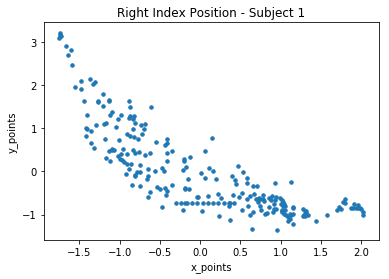

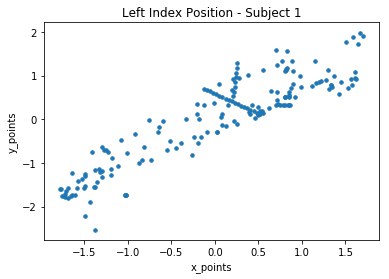

In [34]:
figa = plt.figure()
plt.scatter(fore_right_n[:,0],fore_right_n[:,1], s=12)
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("Right Index Position - Subject 1")
plt.show()
figa.savefig('right_scatter/r_scatter_adi2.pdf', dpi=figa.dpi)

figb = plt.figure()
plt.scatter(fore_left_n[:,0],fore_left_n[:,1], s=12)
plt.xlabel("x_points")
plt.ylabel("y_points")
plt.title("Left Index Position - Subject 1")
plt.show()
figb.savefig('left_scatter/l_scatter_adi2.pdf', dpi=figb.dpi)

RangeIndex(start=1, stop=241, step=1, name='timeFrame')
14.749047342550476
13.290817464729432
180


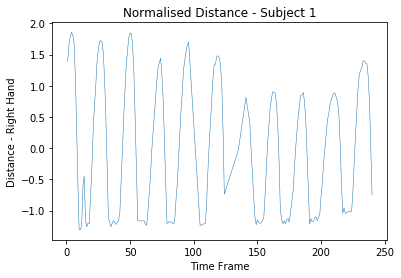

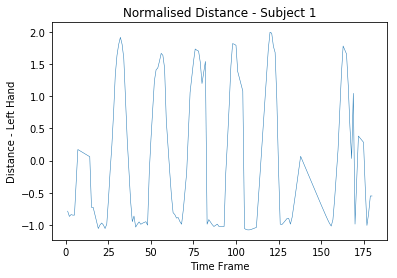

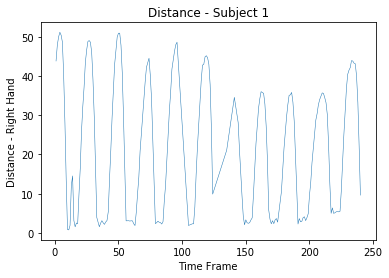

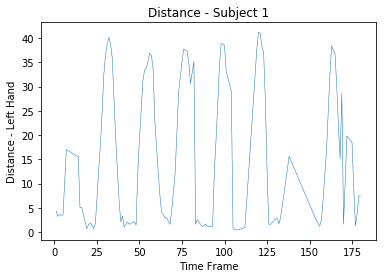

In [35]:
dist_right =  np.linalg.norm(fore_right[:,:2] - thumb_right[:,:2], axis = 1)
dist_right_norm = (dist_right - dist_right.mean(axis=0))/dist_right.std(axis=0)
right_dist = pd.DataFrame(dist_right)
right_dist.index += 1
right_dist.index.name = 'timeFrame'
right_dist.columns = ['distance']
right_dist.to_csv('right_op/rd_adi2.csv')
print(right_dist.index)


dist_left =  np.linalg.norm(fore_left[:,:2] - thumb_left[:,:2], axis = 1)
print(dist_left.mean(axis=0))
print(dist_left.std(axis=0))
dist_left_norm = (dist_left - dist_left.mean(axis=0))/dist_left.std(axis=0)
left_dist = pd.DataFrame(dist_left)
left_dist.index += 1
left_dist.index.name = 'timeFrame'
left_dist.columns = ['distance']
left_dist.to_csv('left_op/ld_adi2.csv')
print(len(dist_left_norm))

fig1 = plt.figure()
plt.plot(np.arange(1,len(dist_right_norm)+1), dist_right_norm, linewidth= 0.5)
plt.xlabel("Time Frame")
plt.ylabel("Distance - Right Hand")
plt.title("Normalised Distance - Subject 1")
plt.show()
fig1.savefig('right_norm_dist/r_norm_adi2.pdf', dpi=fig1.dpi)

fig2 = plt.figure()
plt.plot(np.arange(1,len(dist_left_norm)+1), dist_left_norm, linewidth= 0.5)
plt.xlabel("Time Frame")
plt.ylabel("Distance - Left Hand")
plt.title("Normalised Distance - Subject 1")
plt.show()
fig2.savefig('left_norm_dist/l_norm_adi2.pdf', dpi=fig2.dpi)

fig3 = plt.figure()
plt.plot(np.arange(1,len(dist_right)+1), dist_right, linewidth= 0.5)
plt.xlabel("Time Frame")
plt.ylabel("Distance - Right Hand")
plt.title("Distance - Subject 1")
plt.show()
fig3.savefig('right_dist/rd_adi2.pdf', dpi=fig3.dpi)

fig4 = plt.figure()
plt.plot(np.arange(1,len(dist_left)+1), dist_left, linewidth= 0.5)
plt.xlabel("Time Frame")
plt.ylabel("Distance - Left Hand")
plt.title("Distance - Subject 1")
plt.show()
fig4.savefig('left_dist/ld_adi2.pdf', dpi=fig4.dpi)

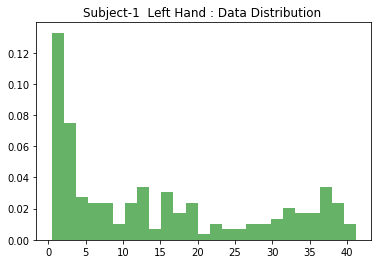

In [36]:
from scipy.stats import norm
# https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data


# Plot the histogram.
figc = plt.figure()
plt.hist(dist_left, bins=25, density=True, alpha=0.6, color='g')


title = " Left Hand : Data Distribution "
plt.title('Subject-1 '+title)


plt.show()
figc.savefig('left_sd/left_sd_adi2.pdf', dpi=figc.dpi)

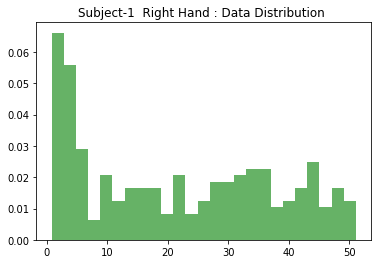

In [37]:
# Plot the histogram.
figd = plt.figure()
plt.hist(dist_right, bins=25, density=True, alpha=0.6, color='g')

title = " Right Hand : Data Distribution "
plt.title('Subject-1 '+title)


plt.show()
figd.savefig('right_sd/right_sd_adi2.pdf', dpi=figd.dpi)

In [1316]:
#N = len(dist_right_norm)
#lags = np.arange(90)
#var=np.var(dist_right_norm)
#xp = dist_right_norm - np.mean(dist_right_norm)
#corr = np.correlate(xp,xp,'full')[N-1:]/var/N
#corr1 = corr[:len(lags)+1]
#print (np.argsort(corr1)[-5:])
#right_acf = pd.DataFrame(corr1)
#right_acf.index.name = 'lags'
#right_acf.columns = ['acf']
#right_acf.to_csv('right_acf/r_acf_Si_1.csv')
#fig4 = plt.figure()
#fig3 = plt.figure()
#plt.plot(corr1)
#plt.grid(True)
#plt.xlabel("Lag")
#plt.ylabel("Autocorrelation for Right_Side")
#plt.show()
#fig3.savefig('acf_plots_right/right_Si_1_acf.pdf', dpi=fig3.dpi)
#print(corr1)

#N1 = len(dist_left_norm)
#lags = np.arange(90)
#var=np.var(dist_left_norm)
#xp1 = dist_left_norm - np.mean(dist_left_norm)
#corr2 = np.correlate(xp1,xp1,'full')[N1-1:]/var/N1
#corr3 = corr2[:len(lags)+1]
#print (np.argsort(corr3)[-5:])
#left_acf = pd.DataFrame(corr3)
#left_acf.index.name = 'lags'
#left_acf.columns = ['acf']
#left_acf.to_csv('left_acf/l_acf_Si_1.csv')
#fig4 = plt.figure()
#plt.plot(corr3)
#plt.grid(True)
#plt.xlabel("Lag")
#plt.ylabel("Autocorrelation for Left Side")
#plt.show()
#fig4.savefig('acf_plots_left/left_Si_1_acf.pdf', dpi=fig3.dpi)
#print(corr3)


In [1317]:
x = np.stack((fore_left[:,0],thumb_left[:,0]), axis = 1)
mean_x = x.mean(axis=1)
mean_x = pd.DataFrame(mean_x)
mean_x.index += 1
mean_x.index.name = 'timeFrame'
mean_x.columns = ['mean_x']
print(mean_x)
mean_x.to_csv('mean_left_horizontal/mean_xl_yehseul1.csv')


y = np.stack((fore_left[:,1],thumb_left[:,1]), axis = 1)
mean_y = y.mean(axis=1)
mean_y = pd.DataFrame(mean_y)
mean_y.index += 1
mean_y.index.name = 'timeFrame'
mean_y.columns = ['mean_y']
print(mean_y)
mean_y.to_csv('mean_left_vertical/mean_yl_yehseul1.csv')

angle = np.arctan2(y[:,0]-y[:,1],x[:,0]-x[:,1])
angle_diff = pd.DataFrame(angle)
angle_diff.index += 1
print(angle_diff)
angle_diff.to_csv('angle_vec_left/a_vecl_yehseul1.csv')

a = np.stack((fore_left[:,0],thumb_left[:,0]), axis = 1)
mean_a = a.mean(axis=1)
mean_a = pd.DataFrame(mean_a)
mean_a.index += 1
mean_a.index.name = 'timeFrame'
mean_a.columns = ['mean_x']
print(mean_a)
mean_a.to_csv('mean_right_horizontal/mean_xr_yehseul1.cv')


b = np.stack((fore_left[:,1],thumb_left[:,1]), axis = 1)
mean_b = y.mean(axis=1)
mean_b = pd.DataFrame(mean_y)
mean_b.index += 1
mean_b.index.name = 'timeFrame'
mean_b.columns = ['mean_y']
print(mean_b)
mean_b.to_csv('mean_right_vertical/mean_yr_yehseul1.csv')

angle1 = np.arctan2(b[:,0]-b[:,1],a[:,0]-a[:,1])
angle_diff1 = pd.DataFrame(angle1)
angle_diff1.index += 1
print(angle_diff1)
#fig5 = plt.figure()
#plt.plot(angle_diff1.index, angle_diff1, linewidth= 0.5,  marker='.', markersize=3)
#plt.xlabel("Time")
#plt.ylabel("Angle of Difference")
#plt.show()
angle_diff.to_csv('angle_vec_right/a_vecr_yehseul1.csv')


              mean_x
timeFrame           
1          840.06150
2          866.15300
3          872.28450
4          869.15700
5          873.33250
6          874.68100
7          874.15250
8          861.09000
9          851.66700
10         843.10300
11         832.79350
12         825.20275
13         817.61200
14         817.16950
15         824.42250
16         847.82200
17         852.40700
18         856.71850
19         858.49025
20         860.26200
21         851.99250
22         842.64000
23         837.73050
24         831.57450
25         824.12250
26         815.96400
27         810.87850
28         807.37600
29         805.58700
30         806.80250
...              ...
91         818.86000
92         817.31000
93         823.69800
94         832.12500
95         850.15550
96         865.51150
97         866.28550
98         864.77050
99         863.24100
100        850.79150
101        838.11650
102        826.29450
103        817.90550
104        808.69700
105        80